### Data Science Homework-07

#### Name: Muhammad Talha Salani
#### ID: ms07725

Purpose:
Demonstrate understating of Classification technique for prediction and recommendation

Points: 100

Deliverables: Submit ipynb code file along with your answer

Use the dataset Admission_Chance_Classification.csv and burger-king-
menu-2.csv

• Perform analysis on the following questions. Make sure to include interpretation of each
result including accuracy, confusion matrix and other necessary information to support
your answer

Classification using Admission_Chance_Classification.csv

1. Create a train and test set. Consider Admit column as class/label column (Y) and use
rest of the columns as inputs (X). Use 30% (test_size=0.3) records for test set. Use the
same train and test set for all your analysis with different classifiers.
2. In your code, set the seed after you read the data. This will keep your data and
calculation consistent throughout the analysis irrespective of multiple runs. See the
example code for the class random_state=99
3. Create a classification model to predict Admit status using Decision Tree. Visualize
the decision tree. Interpret the decision tree. Discuss which attributes are important
and which are not important.
4. Perform the Tree Pruning Analysis and evaluate the results. Visualize the tree after
pruning. Discuss the tree and overall results before and after pruning.
5. Create a classification model to predict Admit status using RandomForest. Include
all the analysis steps including variable importance plot. Try at least 5 different values
of n_estimators (number of trees) such as 10, 50, 100, 150, 200 and compare the
classification accuracy for each of them. Pick the best model (based on n_estimators)
for your final comparison.
6. Report the comparison between Decision Tree and RandomForest in terms of
classification performance.

Recommendation using burger-king-menu-2.csv
1. Build a decision tree to recommend similar food based on their attributes. Interpret
your decision tree and tell some interesting insights from it. You do not (necessarily)
need to pick all the food (rows) and attributes (columns). Pick 1 category (Burgers,
Chicken or Breakfast) of your choice and explain/interpret your recommendations.
Note: After you filter your data based on Category, you need to remove Category
column from the data and then create a decision tree. Use Item column as your
class/label (Y)

In [282]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

### Classification using Admission_Chance_Classification.csv!

In [284]:
df = pd.read_csv('Admission_Chance_Classification.csv')

In [285]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,YES,YES
1,324,107,4,4.0,4.5,8.87,YES,YES
2,316,104,3,3.0,3.5,8.00,YES,YES
3,322,110,3,3.5,2.5,8.67,YES,YES
4,314,103,2,2.0,3.0,8.21,NO,YES


1- Create a train and test set. Consider Admit column as class/label column (Y) and use rest of the columns as inputs (X). Use 30% (test_size=0.3) records for test set. Use the same train and test set for all your analysis with different classifiers.

In [287]:
df['Research'] = df['Research'].map({'YES': 1, 'NO': 0})
df['Admit'] = df['Admit'].map({'YES': 1, 'NO': 0})

X = df.drop('Admit', axis=1)
y = df['Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)


2- In your code, set the seed after you read the data. This will keep your data and calculation consistent throughout the analysis irrespective of multiple runs. See the example code for the class random_state=99

In the code above, we set random_state=99 in the train_test_split function to ensure consistency across runs. This way, the train-test split remains the same every time the code is run.



3- Create a classification model to predict Admit status using Decision Tree. Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important.

Decision Tree Model Results
Accuracy: 0.9
Confusion Matrix:
 [[  5   5]
 [  7 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.95      0.94      0.94       110

    accuracy                           0.90       120
   macro avg       0.69      0.72      0.70       120
weighted avg       0.91      0.90      0.90       120



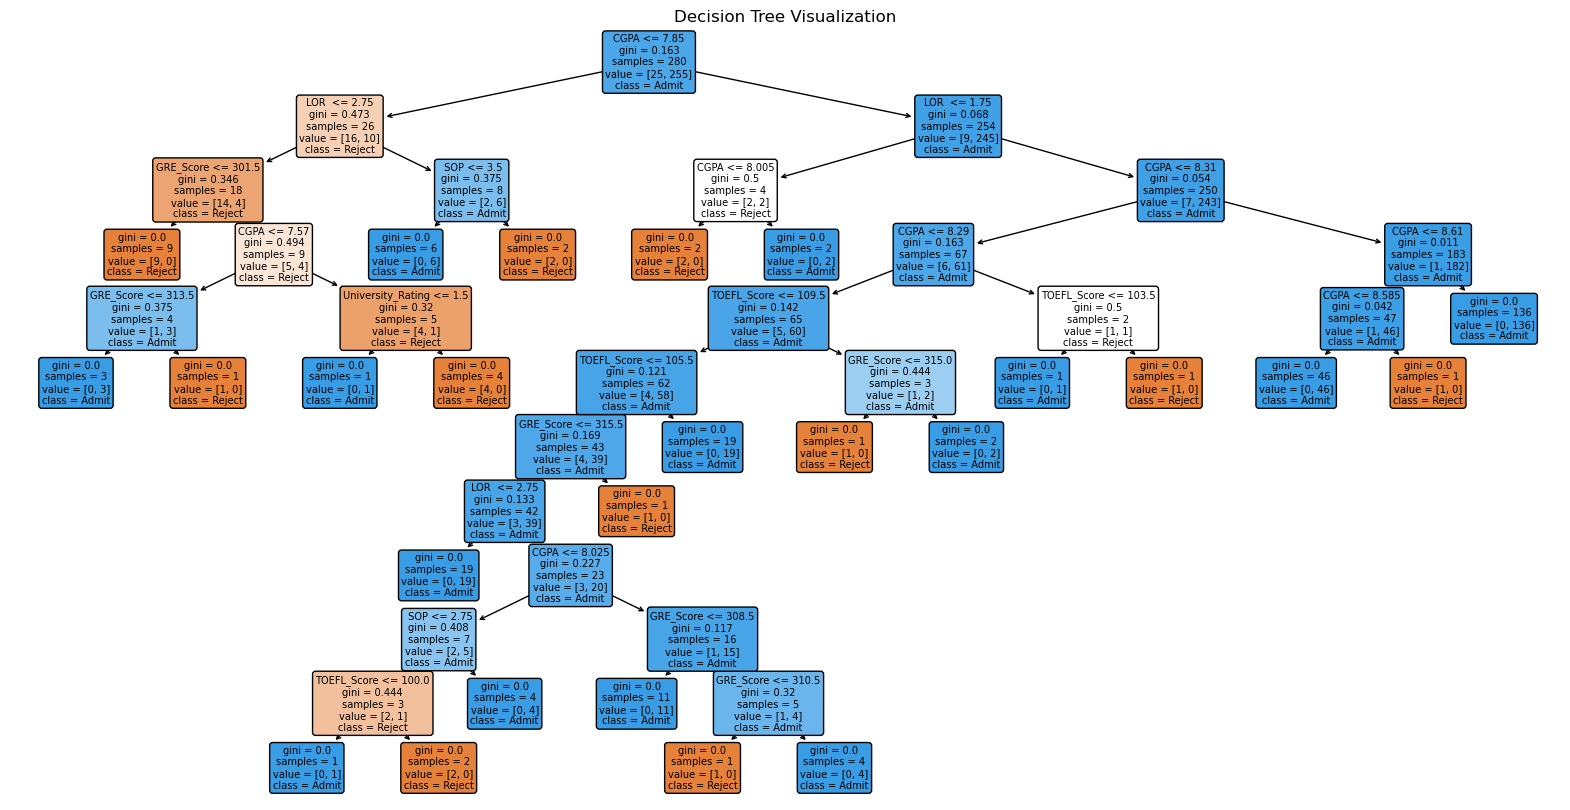

Feature Importance:
              Feature  Importance
5               CGPA    0.506695
0          GRE_Score    0.179431
4               LOR     0.114058
3                SOP    0.099346
1        TOEFL_Score    0.065332
2  University_Rating    0.035137
6           Research    0.000000


In [291]:
dt_model = DecisionTreeClassifier(random_state=99)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Decision Tree Model Results")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Reject', 'Admit'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)


#### Analysis: 

With an accuracy of 90%, the Decision Tree model demonstrated a strong ability to predict admission status. A deeper examination of the confusion matrix, however, shows that the model had trouble correctly predicting the negative class (reject), producing only five genuine negatives out of ten actual rejections and five erroneous negatives. Given that the negative class's precision is only 42%, it is likely that a large number of the anticipated rejections were incorrectly classified. The model, on the other hand, demonstrated exceptional performance in predicting admissions (positive class), with a high precision of 95% and a recall of 94%, demonstrating its ability to identify applicants who are likely to be admitted.

With a macro average F1-score of 0.70, the classification report shows a possible bias towards the majority class and emphasizes the performance gap between the two groups. According to feature importance analysis, CGPA accounts for more than half of the model's decisions, making it the most significant predictor of admission. GRE score and LOR come in second and third, respectively. On the other hand, the Research feature is unimportant, indicating that it might not be a significant factor in this dataset when it comes to admissions prediction. The model's misclassification of rejections indicates a potential area for development, perhaps by model adjustments or the use of an alternative classification strategy that more evenly distributes the class distribution, even though overall the model demonstrates high predictive ability.

4- Perform the Tree Pruning Analysis and evaluate the results. Visualize the tree after pruning. Discuss the tree and overall results before and after pruning.

#### Train the Decision Tree Model Before Pruning

Decision Tree Model Results (Before Pruning)
Accuracy: 0.9
Confusion Matrix:
 [[  5   5]
 [  7 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.95      0.94      0.94       110

    accuracy                           0.90       120
   macro avg       0.69      0.72      0.70       120
weighted avg       0.91      0.90      0.90       120



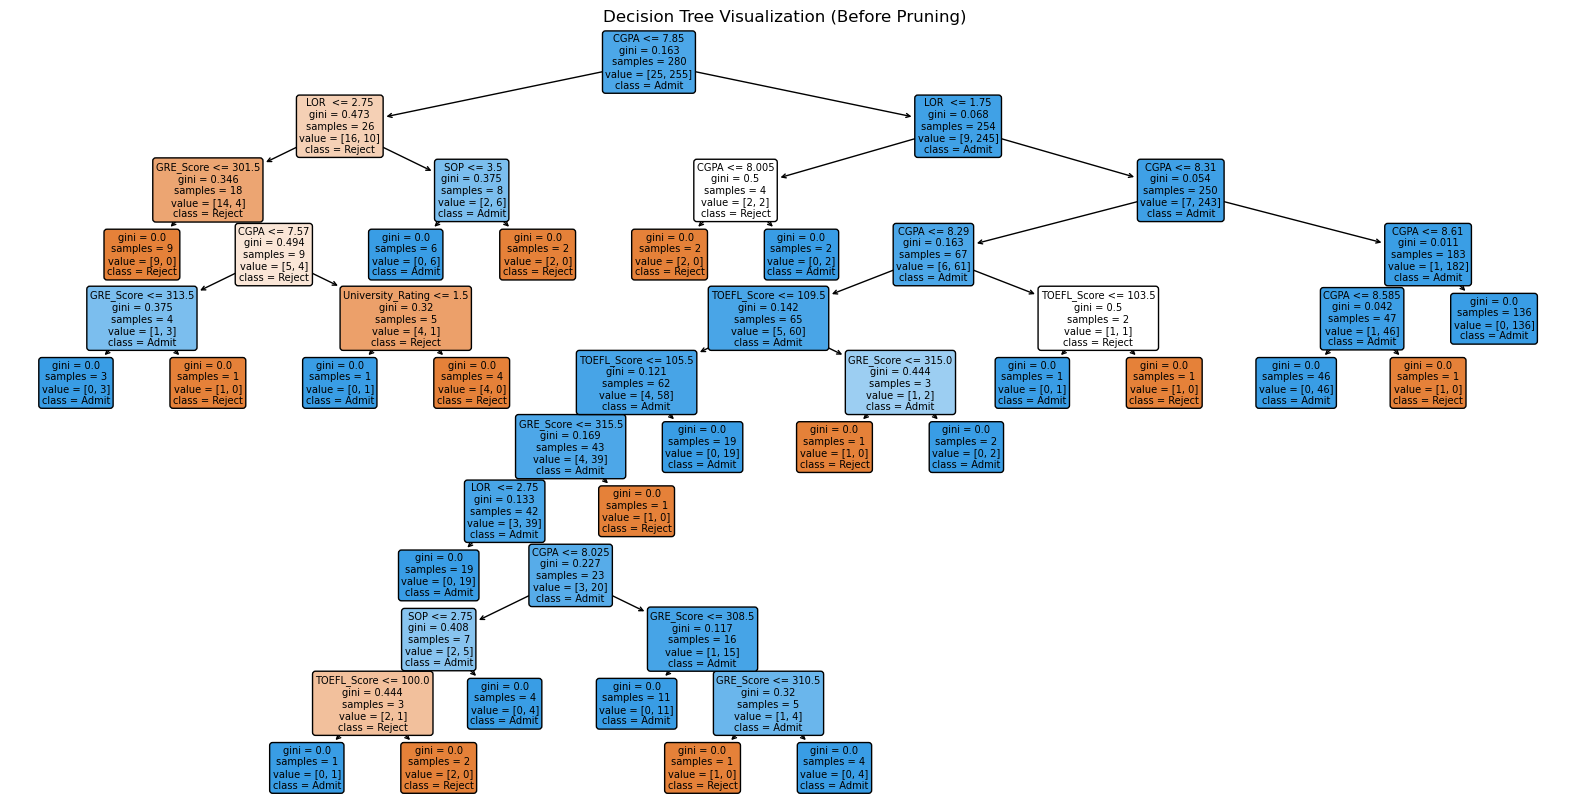

In [295]:
dt_model = DecisionTreeClassifier(random_state=99)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy_before_pruning = accuracy_score(y_test, y_pred)
conf_matrix_before_pruning = confusion_matrix(y_test, y_pred)
class_report_before_pruning = classification_report(y_test, y_pred)

print("Decision Tree Model Results (Before Pruning)")
print("Accuracy:", accuracy_before_pruning)
print("Confusion Matrix:\n", conf_matrix_before_pruning)
print("Classification Report:\n", class_report_before_pruning)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Reject', 'Admit'], filled=True, rounded=True)
plt.title("Decision Tree Visualization (Before Pruning)")
plt.show()


#### Train the Decision Tree Model After Pruning

Decision Tree Model Results (After Pruning)
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[  5   5]
 [  3 107]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.96      0.97      0.96       110

    accuracy                           0.93       120
   macro avg       0.79      0.74      0.76       120
weighted avg       0.93      0.93      0.93       120



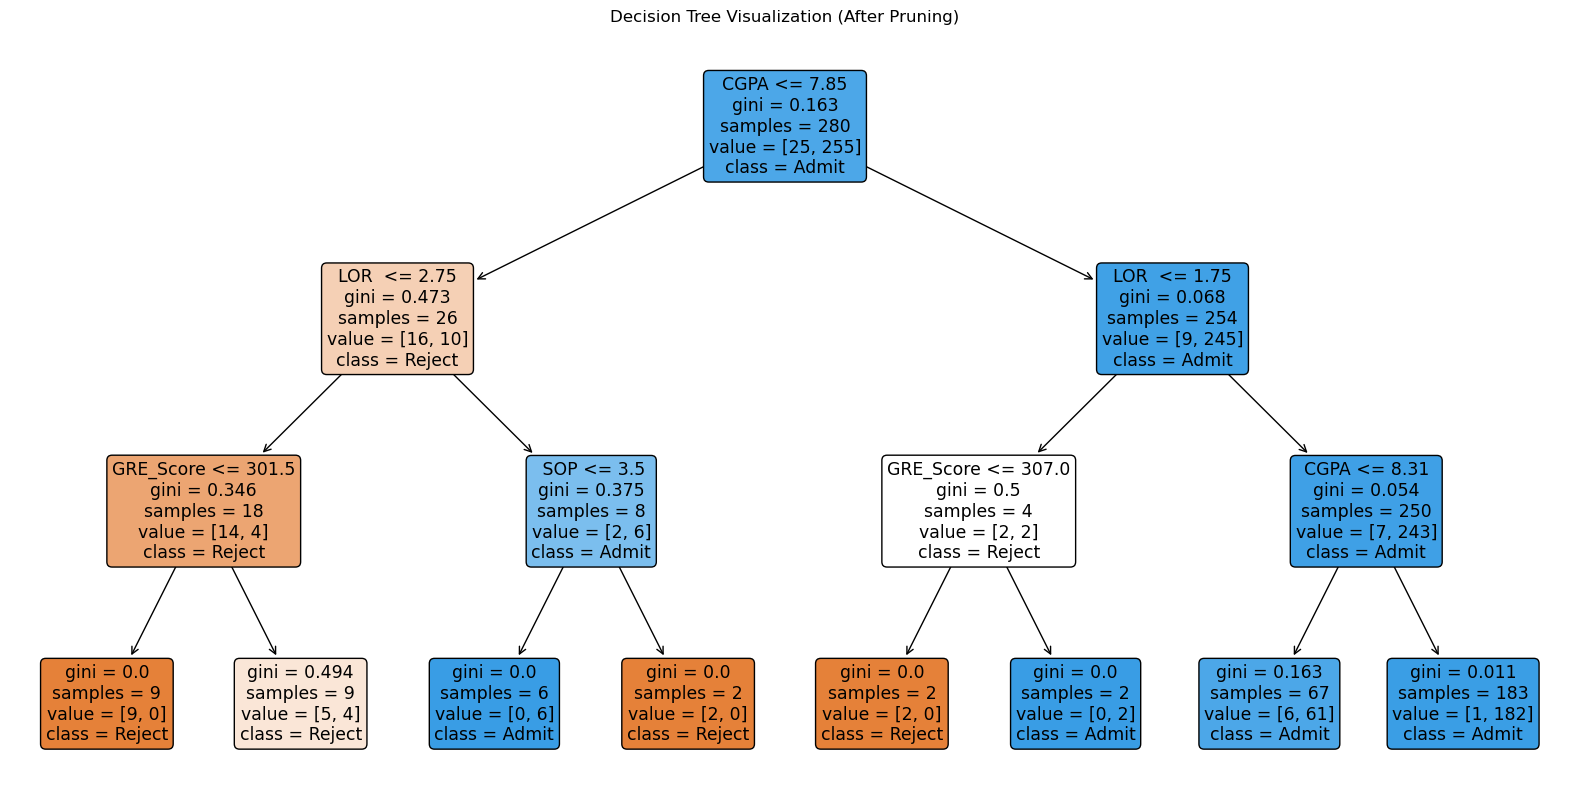

In [297]:
dt_model_pruned = DecisionTreeClassifier(max_depth=3, random_state=99)
dt_model_pruned.fit(X_train, y_train)

y_pred_pruned = dt_model_pruned.predict(X_test)
accuracy_after_pruning = accuracy_score(y_test, y_pred_pruned)
conf_matrix_after_pruning = confusion_matrix(y_test, y_pred_pruned)
class_report_after_pruning = classification_report(y_test, y_pred_pruned)

print("Decision Tree Model Results (After Pruning)")
print("Accuracy:", accuracy_after_pruning)
print("Confusion Matrix:\n", conf_matrix_after_pruning)
print("Classification Report:\n", class_report_after_pruning)

plt.figure(figsize=(20,10))
plot_tree(dt_model_pruned, feature_names=X.columns, class_names=['Reject', 'Admit'], filled=True, rounded=True)
plt.title("Decision Tree Visualization (After Pruning)")
plt.show()


#### Analysis:

The Decision Tree model's accuracy increased from 90% to roughly 93.3% following pruning, indicating a noticeable improvement. The model maintained the same number of false positives for class 0 (Reject) at 5, according to the confusion matrix, even though the number of false negatives for class 1 (Admit) marginally fell from 7 to 3. The classification report shows that the Admit class's precision, recall, and F1-score improved and stayed consistently high (96% precision and 97% recall post-pruning). In contrast, the Reject class's performance improved significantly, with precision increasing from 42% to 62% and recall remaining at 50%.

Overall, these findings imply that pruning improved performance in differentiating between the two classes and reduced overfitting. In particular, pruning increased the model's dependability in detecting rejects while maintaining its capacity to correctly categorize accepts. Pruning effectively increases the model's generalizability to new data, as evidenced by this balance between precision and recall.

5- Create a classification model to predict Admit status using RandomForest. Include all the analysis steps including variable importance plot. Try at least 5 different values of n_estimators (number of trees) such as 10, 50, 100, 150, 200 and compare the classification accuracy for each of them. Pick the best model (based on n_estimators) for your final comparison.

In [300]:
n_estimators_list = [10, 50, 100, 150, 200]
accuracy_results = {}

for n in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=99)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_results[n] = accuracy
    print(f"Random Forest with {n} trees - Accuracy: {accuracy:.4f}")

best_n = max(accuracy_results, key=accuracy_results.get)
print(f"\nBest n_estimators: {best_n} with accuracy: {accuracy_results[best_n]:.4f}")


Random Forest with 10 trees - Accuracy: 0.9417
Random Forest with 50 trees - Accuracy: 0.9583
Random Forest with 100 trees - Accuracy: 0.9583
Random Forest with 150 trees - Accuracy: 0.9417
Random Forest with 200 trees - Accuracy: 0.9333

Best n_estimators: 50 with accuracy: 0.9583


In [301]:
best_rf_model = RandomForestClassifier(n_estimators=best_n, random_state=99)
best_rf_model.fit(X_train, y_train)

y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print("\nBest Random Forest Model Results")
print("Accuracy:", accuracy_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)



Best Random Forest Model Results
Accuracy: 0.9583333333333334
Confusion Matrix:
 [[  5   5]
 [  0 110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.96      1.00      0.98       110

    accuracy                           0.96       120
   macro avg       0.98      0.75      0.82       120
weighted avg       0.96      0.96      0.95       120




Feature Importance:
              Feature  Importance
5               CGPA    0.361439
0          GRE_Score    0.176276
1        TOEFL_Score    0.151613
4               LOR     0.117539
3                SOP    0.109847
2  University_Rating    0.058075
6           Research    0.025211


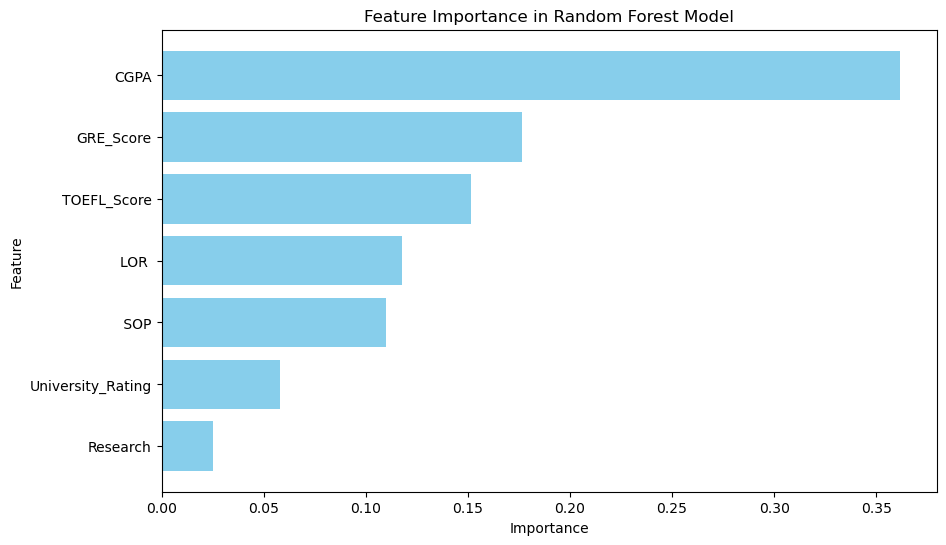

In [302]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  
plt.show()


#### Analysis:

With an accuracy of 95.83%, the Random Forest model with 50 trees outperformed models with different `n_estimators` values. With 100% recall and 96% precision, the confusion matrix displays good predictive performance on the majority class (Admit = 1), whereas the minority class (Admit = 0) has poorer recall at 50% since there are less samples. With a high weighted average f1-score of 0.95, the classification report demonstrates the model's strong overall performance. The most significant predictor, according to feature importance analysis, is CGPA, which is followed by GRE and TOEFL scores. Less weight is given to features like research and university rating in the model, indicating a strong focus on academic criteria when estimating the likelihood of admission. 

This model strikes a balance between high accuracy and interpretable feature importance, making it a reliable choice for this classification task.

6- Report the comparison between Decision Tree and RandomForest in terms of classification performance.


#### Comparitive Analysis:

With a classification accuracy of 95.83% as opposed to the Decision Tree's 93.33% (after pruning), the Random Forest model performed better than the Decision Tree. Particularly for the minority class (Admit = 0), where it exhibited fewer false negatives than the Decision Tree model, the Random Forest's confusion matrix demonstrates enhanced precision and recall. Furthermore, as seen by higher weighted averages for precision and recall, the Random Forest showed more balanced performance across criteria. Additionally, feature importance analysis showed that Random Forest better reflects the subtle contributions of predictors such as CGPA, GRE, and TOEFL scores, whereas the Decision Tree placed a greater emphasis on CGPA. 

This suggests that Random Forest, with its ensemble of decision trees, reduces overfitting and enhances predictive accuracy, making it the preferred model for this classification task.








#### Recommendation using burger-king-menu-2.csv

1- Build a decision tree to recommend similar food based on their attributes. Interpret your decision tree and tell some interesting insights from it. You do not (necessarily) need to pick all the food (rows) and attributes (columns). Pick 1 category (Burgers, Chicken or Breakfast) of your choice and explain/interpret your recommendations. Note: After you filter your data based on Category, you need to remove Category column from the data and then create a decision tree. Use Item column as your class/label (Y)

In [308]:
df2 = pd.read_csv('burger-king-menu-2.csv')

In [309]:
df2.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,Burgers,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,Burgers,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,Burgers,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,Burgers,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,Burgers,980,580,64.0,24.0,3.0,195,1410,50,2,11,52


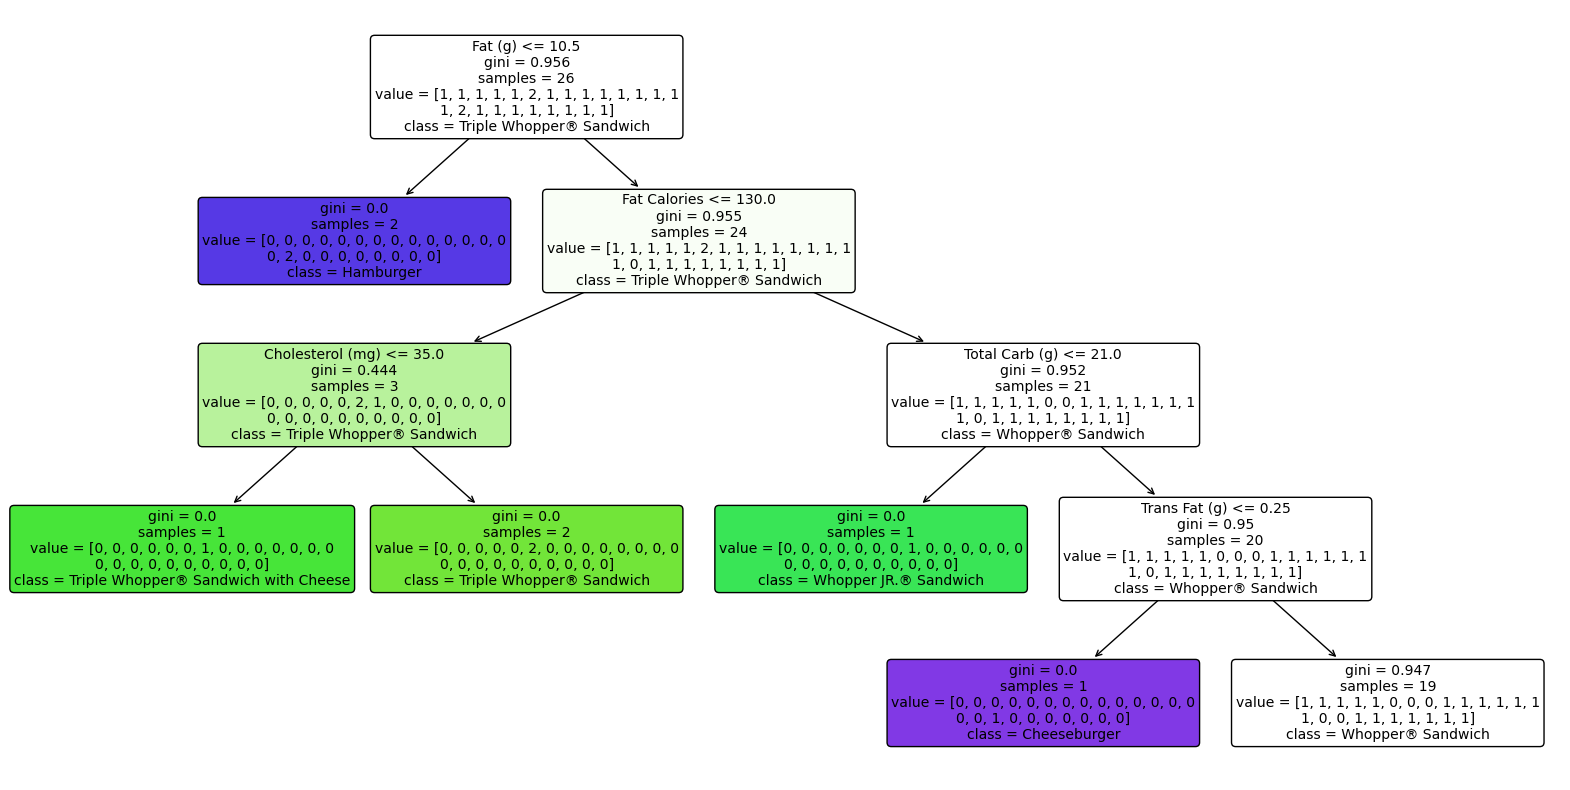

In [310]:
burger_data = df2[df2['Category'] == 'Burgers'].drop('Category', axis=1)

X = burger_data.drop('Item', axis=1)
Y = burger_data['Item']

clf = DecisionTreeClassifier(random_state=0, max_depth=4)  # Limited depth for interpretability
clf.fit(X, Y)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=Y.unique(), filled=True, rounded=True)
plt.show()

### Interpretation and Insights

The decision tree illustrates how Burger King's burger offerings are distinguished by several nutritional characteristics. This is how each level is interpreted:

1. **Root Node (Fat (g))**: The initial split is determined by `Fat (g)`, using 10.5 grams as the threshold. Any burger that has `Fat (g)` less than or equal to 10.5 is categorized as a "Hamburger," meaning that it contains the least amount of fat of all the possibilities.

2. The next split is based on `Fat Calories`, with a threshold of 130 calories, for items with `Fat (g)` more than 10.5. Burgers with fewer calories, such as "Whopper JR.", are separated from those with more calories by this division.

3. **Third Level (Cholesterol and Total Carb)**: `Cholesterol (mg)` further distinguishes burgers with moderate fat calories (≤130). "Triple Whopper® Sandwich with Cheese" and "Triple Whopper® Sandwich," which are distinguished by having cholesterol levels below 35 mg, highlight how crucial cholesterol levels are in setting these upscale options apart. The determining element for burgers with more fat calories is `Total Carb (g)`, which separates "Whopper JR." from "Whopper® Sandwich."

4. **Fourth Level (Trans Fat)**: `Trans Fat (g)` is used to differentiate between burgers with comparable carbohydrate contents, such as "Whopper® Sandwich" and "Cheeseburger." This demonstrates how trans fat can be a crucial characteristic in differentiating several Whopper varieties with cheese added.

### Insights

As the main criterion for classification, the decision tree analysis shows that **fat content** is the most distinctive feature among Burger King's burger selections. Higher fat burgers are further distinguished by their **fat calories and cholesterol** levels, which show differences in richer burger selections according to these nutritional characteristics. The **trans fat and carbohydrate content** of comparable burger variations are significant factors that can help health-conscious consumers who could favor less trans-fat options. By classifying things based on fat, calories, and other nutritional parameters, this classification helps customers choose burgers that fit their dietary choices or constraints.